#  Phenotypic phase planes

In [5]:
#In this screipt we analyse the phenotype phase planes for all relevant conditions: aerobic and anaerobic.
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
plt.style.use('ggplot')


In [6]:
# Verify working directory and change it if needed
# import os
# os.getcwd()
#os.chdir("DIR_PATH") #change accordingly

In [40]:
model = read_sbml_model("../data/models/yeast_resv_glc.xml")

In [41]:
# Original medium, no modifications done yet.
medium = model.medium

In [36]:
model.objective #check the model objective, since it is not biomass, we will change it to it.

In [35]:
# Increase glucose concentration to 100, accodring to previous model. 
# medium = model.medium
# medium['EX_glc__D_e'] = 2000
# model.reactions.EX_glc__D_e.bounds = -1000, 0

## Phenotype phase plane for res-yeast.xml model
### Focus on biomass

In [42]:
ppp_biomass = production_envelope( model,
    reactions = [model.reactions.EX_glc__D_e],
    objective = model.reactions.BIOMASS_SC5_notrace)

In [43]:
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,5.228868e-17,NaN,0.287866,3.016363e+00,NaN,-10.000000
1,EX_glc__D_e,0.0,0.000000e+00,NaN,0.275435,3.045455e+00,NaN,-9.476780
2,EX_glc__D_e,0.0,0.000000e+00,NaN,0.263005,3.077947e+00,NaN,-8.953560
3,EX_glc__D_e,0.0,0.000000e+00,NaN,0.250574,3.114473e+00,NaN,-8.430341
4,EX_glc__D_e,0.0,0.000000e+00,NaN,0.238143,3.155832e+00,NaN,-7.907121
5,EX_glc__D_e,0.0,0.000000e+00,NaN,0.225713,3.203053e+00,NaN,-7.383901
6,EX_glc__D_e,0.0,0.000000e+00,NaN,0.213282,3.257476e+00,NaN,-6.860681
7,EX_glc__D_e,0.0,0.000000e+00,NaN,0.200852,3.320885e+00,NaN,-6.337461
8,EX_glc__D_e,0.0,0.000000e+00,NaN,0.188421,3.395707e+00,NaN,-5.814241
9,EX_glc__D_e,0.0,0.000000e+00,NaN,0.175991,3.485327e+00,NaN,-5.291022


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

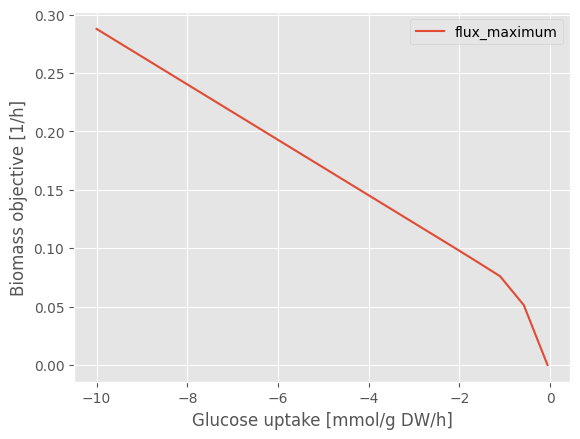

In [44]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


##### Determining the optimal O2 uptake rate

In [45]:
ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.BIOMASS_SC5_notrace)
                    

In [46]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-2.0

<AxesSubplot: xlabel='EX_o2_e'>

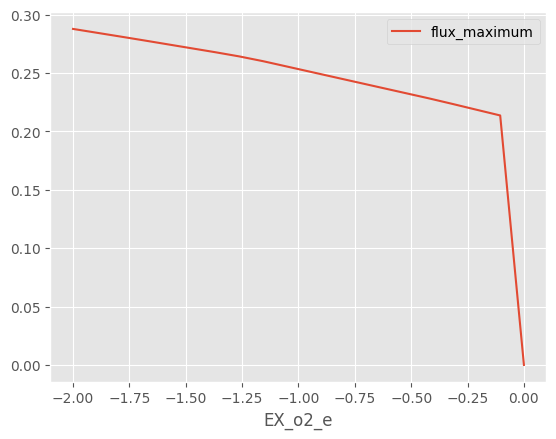

In [49]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum')


### Now lets repeat the previous steps but with focus on glucose uptake.

In [50]:
ppp_resveratrol = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.VVVST1)
ppp_resveratrol

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,1.178571,1.414286e+00,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,1.133724,1.435581e+00,NaN,-9.476780
2,EX_glc__D_e,0.0,0.0,NaN,1.088877,1.459366e+00,NaN,-8.953560
3,EX_glc__D_e,0.0,0.0,NaN,1.044029,1.486103e+00,NaN,-8.430341
4,EX_glc__D_e,0.0,0.0,NaN,0.999182,1.516378e+00,NaN,-7.907121
5,EX_glc__D_e,0.0,0.0,NaN,0.954334,1.550943e+00,NaN,-7.383901
6,EX_glc__D_e,0.0,0.0,NaN,0.909487,1.590781e+00,NaN,-6.860681
7,EX_glc__D_e,0.0,0.0,NaN,0.864640,1.637197e+00,NaN,-6.337461
8,EX_glc__D_e,0.0,0.0,NaN,0.819792,1.691967e+00,NaN,-5.814241
9,EX_glc__D_e,0.0,0.0,NaN,0.774945,1.757569e+00,NaN,-5.291022


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

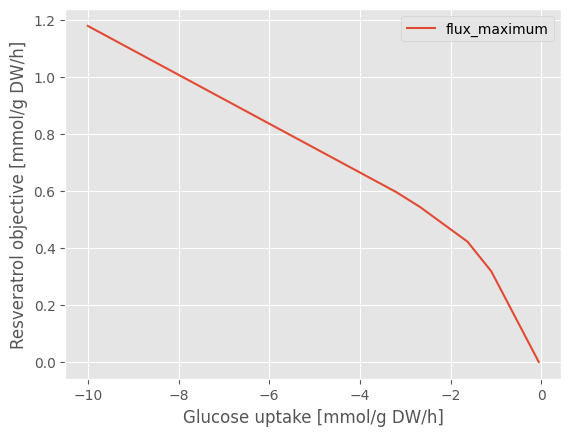

In [51]:
ppp_resveratrol.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)#.set_ylim(0, 3)

Now lets analyze biomass formation vs. O2 uptake

In [57]:
ppp_resv_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.VVVST1)
ppp_resv_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,1.178571,1.414286,NaN,-2.000000
1,EX_glc__D_e,0.0,0.0,NaN,1.159398,1.391278,NaN,-1.894737
2,EX_glc__D_e,0.0,0.0,NaN,1.140226,1.368271,NaN,-1.789474
3,EX_glc__D_e,0.0,0.0,NaN,1.121053,1.345263,NaN,-1.684211
4,EX_glc__D_e,0.0,0.0,NaN,1.101880,1.322256,NaN,-1.578947
5,EX_glc__D_e,0.0,0.0,NaN,1.082707,1.299248,NaN,-1.473684
6,EX_glc__D_e,0.0,0.0,NaN,1.063534,1.276241,NaN,-1.368421
7,EX_glc__D_e,0.0,0.0,NaN,1.044361,1.253233,NaN,-1.263158
8,EX_glc__D_e,0.0,0.0,NaN,1.025188,1.230226,NaN,-1.157895
9,EX_glc__D_e,0.0,0.0,NaN,1.006015,1.207218,NaN,-1.052632


<AxesSubplot: xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

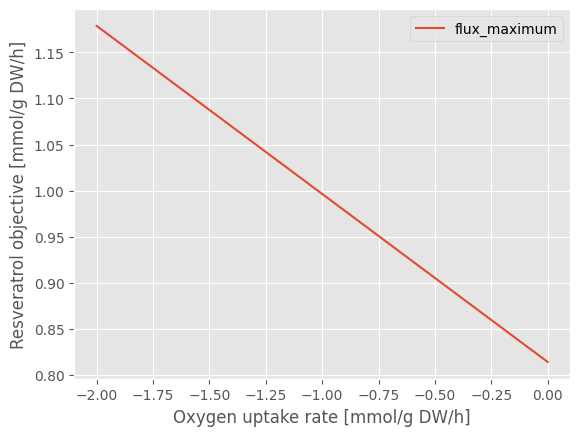

In [61]:
ppp_resv_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)